In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
from matplotlib import pyplot as plt
from art.classifiers import KerasClassifier
from art.attacks import FastGradientMethod, ProjectedGradientDescent,DeepFool, UniversalPerturbation


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((60000, 28, 28,1))
x_test = x_test.reshape((10000, 28, 28,1))

In [3]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28,1)),
    tf.keras.layers.Conv2D(32, kernel_size=(2, 2),
                 activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
cnn.fit(x_train, y_train, epochs=2);

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 14s 241us/sample - loss: 0.2813 - accuracy: 0.9204
Epoch 2/2
60000/60000 [==============================] - 14s 227us/sample - loss: 0.1166 - accuracy: 0.9673


In [10]:
cnn_loss_test, cnn_accuracy_test = cnn.evaluate(x_test, y_test)
print('Cnn Accuracy on test data: {:4.2f}%'.format(cnn_accuracy_test * 100))

10000/10000 [==============================] - 1s 96us/sample - loss: 0.0928 - accuracy: 0.9725
Cnn Accuracy on test data: 97.25%


In [5]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28,1)),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
ann.fit(x_train, y_train, epochs=2);

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 13s 214us/sample - loss: 0.3515 - accuracy: 0.9012
Epoch 2/2
60000/60000 [==============================] - 13s 217us/sample - loss: 0.2899 - accuracy: 0.9178


In [7]:
ann_loss_test, ann_accuracy_test = ann.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(ann_accuracy_test * 100))

10000/10000 [==============================] - 1s 84us/sample - loss: 0.2868 - accuracy: 0.9182
Accuracy on test data: 91.82%


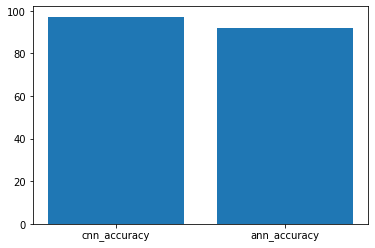

In [11]:
names = ['cnn_accuracy', 'ann_accuracy']
values = [cnn_accuracy_test*100, ann_accuracy_test*100]
plt.bar(names, values)
plt.show()

In [12]:
cnn_classifier = KerasClassifier(model=cnn, clip_values=(0, 1))
ann_classifier = KerasClassifier(model=ann, clip_values=(0, 1))

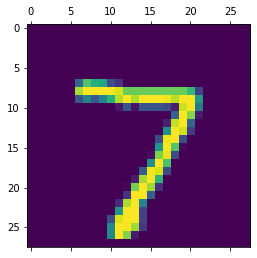

In [39]:
plt.matshow(x_test[0].reshape((28,28)))#original
plt.show()

In [14]:
#(2) FastGradientMethod
attack_fgsm_cnn = FastGradientMethod(classifier=cnn_classifier, eps=0.3)
x_test_adv_cnn_FGD = attack_fgsm_cnn.generate(x_test)
FGD_cnn_attack_loss_test, FGD_cnn_attack_accuracy_test = cnn.evaluate(x_test_adv_cnn_FGD, y_test)
FGD_cnn_perturbation = np.mean(np.abs((x_test_adv_cnn_FGD - x_test)))
print('Accuracy on cnn adversarial test data: {:4.2f}%'.format(FGD_cnn_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(FGD_cnn_perturbation))

10000/10000 [==============================] - 1s 92us/sample - loss: 10.0944 - accuracy: 0.0505
Accuracy on cnn adversarial test data: 5.05%
Average perturbation: 0.15


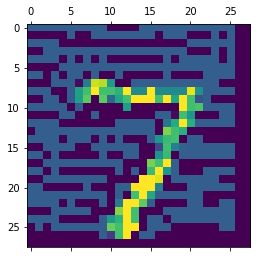

In [31]:
plt.matshow(x_test_adv_cnn_FGD[0].reshape((28,28)))
plt.show()

In [16]:
attack_fgsm_ann = FastGradientMethod(classifier=ann_classifier, eps=0.3)
x_test_adv_ann_FGD = attack_fgsm_ann.generate(x_test)
FGD_ann_attack_loss_test, FGD_ann_attack_accuracy_test = ann.evaluate(x_test_adv_ann_FGD, y_test)
FGD_ann_perturbation = np.mean(np.abs((x_test_adv_ann_FGD - x_test)))
print('Accuracy on ann adversarial test data: {:4.2f}%'.format(FGD_ann_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(FGD_ann_perturbation))

10000/10000 [==============================] - 1s 85us/sample - loss: 17.4155 - accuracy: 0.0454
Accuracy on ann adversarial test data: 4.54%
Average perturbation: 0.16


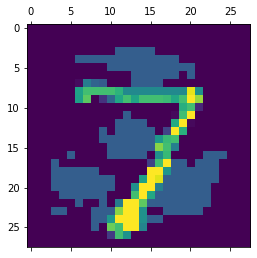

In [32]:
plt.matshow(x_test_adv_ann_FGD[0].reshape((28,28)))
plt.show()

In [17]:
#projected gradient descent
attack_PGD_cnn = ProjectedGradientDescent(classifier=cnn_classifier, eps=0.3,max_iter=10)
x_test_adv_cnn_PGD = attack_PGD_cnn.generate(x_test)
PGD_cnn_attack_loss_test, PGD_cnn_attack_accuracy_test = cnn.evaluate(x_test_adv_cnn_PGD, y_test)
PGD_cnn_perturbation = np.mean(np.abs((x_test_adv_cnn_PGD - x_test)))
print('Accuracy on cnn adversarial test data: {:4.2f}%'.format(PGD_cnn_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(PGD_cnn_perturbation))

10000/10000 [==============================] - 1s 85us/sample - loss: 21.8568 - accuracy: 0.0115
Accuracy on cnn adversarial test data: 1.15%
Average perturbation: 0.13


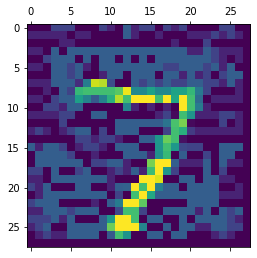

In [33]:
plt.matshow(x_test_adv_cnn_PGD[0].reshape((28,28)))
plt.show()

In [18]:
attack_PGD_ann = ProjectedGradientDescent(classifier=ann_classifier, eps=0.3,max_iter=10)
x_test_adv_ann_PGD = attack_PGD_ann.generate(x_test)
PGD_ann_attack_loss_test, PGD_ann_attack_accuracy_test = ann.evaluate(x_test_adv_ann_PGD, y_test)
PGD_ann_perturbation = np.mean(np.abs((x_test_adv_ann_PGD - x_test)))
print('Accuracy on ann adversarial test data: {:4.2f}%'.format(PGD_ann_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(PGD_ann_perturbation))

10000/10000 [==============================] - 1s 75us/sample - loss: 22.3186 - accuracy: 0.0468
Accuracy on cnn adversarial test data: 4.68%
Average perturbation: 0.15


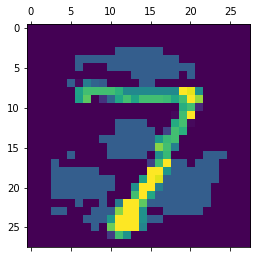

In [34]:
plt.matshow(x_test_adv_ann_PGD[0].reshape((28,28)))
plt.show()

In [19]:
#Deepfool
attack_DF_cnn = DeepFool(classifier=cnn_classifier,max_iter=10)
x_test_adv_cnn_DF = attack_DF_cnn.generate(x_test)
DF_cnn_attack_loss_test, DF_cnn_attack_accuracy_test = cnn.evaluate(x_test_adv_cnn_DF, y_test)
DF_cnn_perturbation = np.mean(np.abs((x_test_adv_cnn_DF - x_test)))
print('Accuracy on cnn adversarial test data: {:4.2f}%'.format(DF_cnn_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(DF_cnn_perturbation))

10000/10000 [==============================] - 1s 82us/sample - loss: 17.7041 - accuracy: 0.1015
Accuracy on cnn adversarial test data: 10.15%
Average perturbation: 0.21


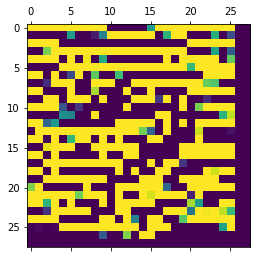

In [35]:
plt.matshow(x_test_adv_cnn_DF[0].reshape((28,28)))
plt.show()

In [20]:
attack_DF_ann = DeepFool(classifier=ann_classifier,max_iter=10)
x_test_adv_ann_DF = attack_DF_ann.generate(x_test)
DF_ann_attack_loss_test, DF_ann_attack_accuracy_test = ann.evaluate(x_test_adv_ann_DF, y_test)
DF_ann_perturbation = np.mean(np.abs((x_test_adv_ann_DF - x_test)))
print('Accuracy on ann adversarial test data: {:4.2f}%'.format(DF_ann_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(DF_ann_perturbation))

10000/10000 [==============================] - 1s 74us/sample - loss: 21.8407 - accuracy: 0.0643
Accuracy on cnn adversarial test data: 6.43%
Average perturbation: 0.14


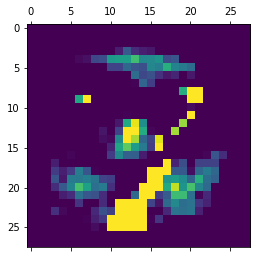

In [36]:
plt.matshow(x_test_adv_ann_DF[0].reshape((28,28)))
plt.show()

In [24]:
#Universal Perturbation Attack
attack_UP_cnn = UniversalPerturbation(classifier=cnn_classifier,max_iter= 3)
x_test_adv_cnn_UP = attack_UP_cnn.generate(x_test)
UP_cnn_attack_loss_test, UP_cnn_attack_accuracy_test = cnn.evaluate(x_test_adv_cnn_UP, y_test)
UP_cnn_perturbation = np.mean(np.abs((x_test_adv_cnn_UP - x_test)))
print('Accuracy on cnn adversarial test data: {:4.2f}%'.format(UP_cnn_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(UP_cnn_perturbation))

10000/10000 [==============================] - 1s 72us/sample - loss: 36.9189 - accuracy: 0.1135
Accuracy on cnn adversarial test data: 11.35%
Average perturbation: 0.25


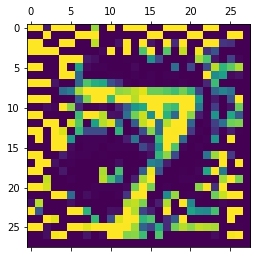

In [37]:
plt.matshow(x_test_adv_cnn_UP[0].reshape((28,28)))
plt.show()

In [25]:
attack_UP_ann = UniversalPerturbation(classifier=ann_classifier,max_iter= 3)
x_test_adv_ann_UP = attack_UP_ann.generate(x_test)
UP_ann_attack_loss_test, UP_ann_attack_accuracy_test = ann.evaluate(x_test_adv_ann_UP, y_test)
UP_ann_perturbation = np.mean(np.abs((x_test_adv_ann_UP - x_test)))
print('Accuracy on ann adversarial test data: {:4.2f}%'.format(UP_ann_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(UP_ann_perturbation))

10000/10000 [==============================] - 1s 66us/sample - loss: 32.6381 - accuracy: 0.1135
Accuracy on ann adversarial test data: 11.35%
Average perturbation: 0.26


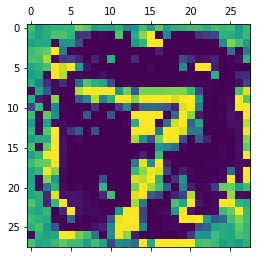

In [38]:
plt.matshow(x_test_adv_ann_UP[0].reshape((28,28)))
plt.show()

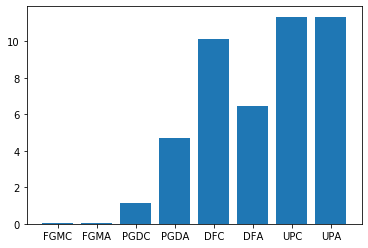

In [29]:
names = ['FGMC', 'FGMA','PGDC', 'PGDA','DFC', 'DFA','UPC', 'UPA']
values = [FGD_cnn_attack_accuracy_test,FGD_ann_attack_accuracy_test,PGD_cnn_attack_accuracy_test * 100,PGD_ann_attack_accuracy_test * 100,
    DF_cnn_attack_accuracy_test * 100, DF_ann_attack_accuracy_test * 100,UP_cnn_attack_accuracy_test * 100,UP_ann_attack_accuracy_test * 100]
plt.bar(names, values)
plt.show()

In [56]:
adversary_cnn = []
for i in range(2500):
    adversary_cnn.append(x_test_adv_cnn_FGD[i])
for i in range(2500,5000):
    adversary_cnn.append(x_test_adv_cnn_PGD[i])
for i in range(5000,7500):
    adversary_cnn.append(x_test_adv_cnn_DF[i])
for i in range(7500,10000):
    adversary_cnn.append(x_test_adv_cnn_UP[i])
adversary_cnn = np.array(adversary_cnn)
adversary_cnn_attack_loss_test, adversary_cnn_attack_accuracy_test = cnn.evaluate(adversary_cnn, y_test)
adversary_cnn_perturbation = np.mean(np.abs((adversary_cnn - x_test)))
print('Accuracy on cnn adversarial test data: {:4.2f}%'.format(adversary_cnn_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(adversary_cnn_perturbation))

10000/10000 [==============================] - 1s 68us/sample - loss: 21.7400 - accuracy: 0.0656
Accuracy on cnn adversarial test data: 6.56%
Average perturbation: 0.19


In [57]:
adversary_ann = []
for i in range(2500):
    adversary_ann.append(x_test_adv_ann_FGD[i])
for i in range(2500,5000):
    adversary_ann.append(x_test_adv_ann_PGD[i])
for i in range(5000,7500):
    adversary_ann.append(x_test_adv_ann_DF[i])
for i in range(7500,10000):
    adversary_ann.append(x_test_adv_ann_UP[i])
adversary_ann = np.array(adversary_ann)
adversary_ann_attack_loss_test, adversary_ann_attack_accuracy_test = cnn.evaluate(adversary_ann, y_test)
adversary_ann_perturbation = np.mean(np.abs((adversary_ann - x_test)))
print('Accuracy on ann adversarial test data: {:4.2f}%'.format(adversary_ann_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(adversary_ann_perturbation))

10000/10000 [==============================] - 1s 71us/sample - loss: 7.6171 - accuracy: 0.2056
Accuracy on ann adversarial test data: 20.56%
Average perturbation: 0.18


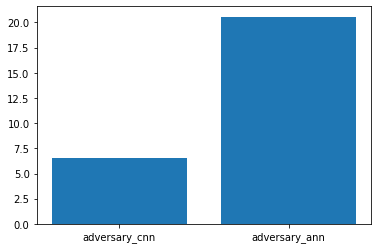

In [58]:
names = ['adversary_cnn', 'adversary_ann']
values = [adversary_cnn_attack_accuracy_test*100, adversary_ann_attack_accuracy_test*100]
plt.bar(names, values)
plt.show()

In [44]:
augmented_test1 = []
for i in range(5000):
    augmented_test1.append(x_test[i])
for i in range(5000,6250):
    augmented_test1.append(x_test_adv_cnn_FGD[i])
for i in range(6250,7500):
    augmented_test1.append(x_test_adv_cnn_PGD[i])
for i in range(7500,8750):
    augmented_test1.append(x_test_adv_cnn_DF[i])
for i in range(8750,10000):
    augmented_test1.append(x_test_adv_cnn_UP[i])
augmented_test1 = np.array(augmented_test)
mixed_cnn_attack_loss_test, mixed_cnn_attack_accuracy_test = cnn.evaluate(augmented_test1, y_test)
mixed_cnn_perturbation = np.mean(np.abs((augmented_test1 - x_test)))
print('Accuracy on cnn adversarial test data: {:4.2f}%'.format(mixed_cnn_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(mixed_cnn_perturbation))

10000/10000 [==============================] - 1s 71us/sample - loss: 10.9615 - accuracy: 0.5104
Accuracy on cnn adversarial test data: 51.04%
Average perturbation: 0.10


In [50]:
augmented_test2 = []
for i in range(5000):
    augmented_test2.append(x_test[i])
for i in range(5000,6250):
    augmented_test2.append(x_test_adv_ann_FGD[i])
for i in range(6250,7500):
    augmented_test2.append(x_test_adv_ann_PGD[i])
for i in range(7500,8750):
    augmented_test2.append(x_test_adv_ann_DF[i])
for i in range(8750,10000):
    augmented_test2.append(x_test_adv_ann_UP[i])
augmented_test2 = np.array(augmented_test2)
mixed_ann_attack_loss_test, mixed_ann_attack_accuracy_test = ann.evaluate(augmented_test2, y_test)
mixed_ann_perturbation = np.mean(np.abs((augmented_test2 - x_test)))
print('Accuracy on cnn adversarial test data: {:4.2f}%'.format(mixed_ann_attack_accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(mixed_ann_perturbation))

10000/10000 [==============================] - 1s 70us/sample - loss: 12.7557 - accuracy: 0.4748
Accuracy on cnn adversarial test data: 47.48%
Average perturbation: 0.09


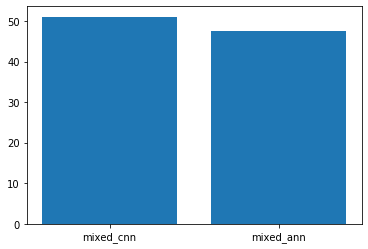

In [51]:
names = ['mixed_cnn', 'mixed_ann']
values = [mixed_cnn_attack_accuracy_test*100, mixed_ann_attack_accuracy_test*100]
plt.bar(names, values)
plt.show()

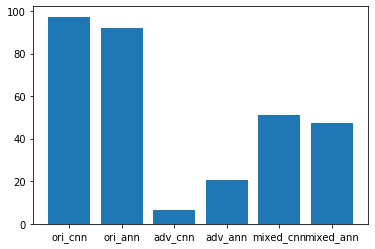

In [60]:
names = ['ori_cnn', 'ori_ann','adv_cnn', 'adv_ann','mixed_cnn', 'mixed_ann']
values = [cnn_accuracy_test*100, ann_accuracy_test*100,adversary_cnn_attack_accuracy_test*100, adversary_ann_attack_accuracy_test*100,mixed_cnn_attack_accuracy_test*100, mixed_ann_attack_accuracy_test*100]
plt.bar(names, values)
plt.show()

In [ ]:
#6 From the graph above, we can see that in mixed dataset cnn performs better than ann however in all adversary examples, ann performs much beeter than cnn.
#In original dataset, cnn performs a little higher than ann. I think it is because the structure doesn't have so many layers to protect CNN.